# EfficientNet 
Generalmente, las arquitecturas se construyen demasiado anchas, profundas o con una resolución de entrada muy alta. Aumentar estas características ayuda inicialmente, pero se satura el modelo rápidamente y sólo tiene más parámetros y no es más eficiente. 

EfficientNet es una arquitectura de red neuronal convolucional creada a partir de algoritmos de Machine Learning(*Neural Architectures Search*) y consiste en un método que escala uniformemente todas las dimensiones de profundidad/ancho/resolución de la red utilizando un coeficiente compuesto.

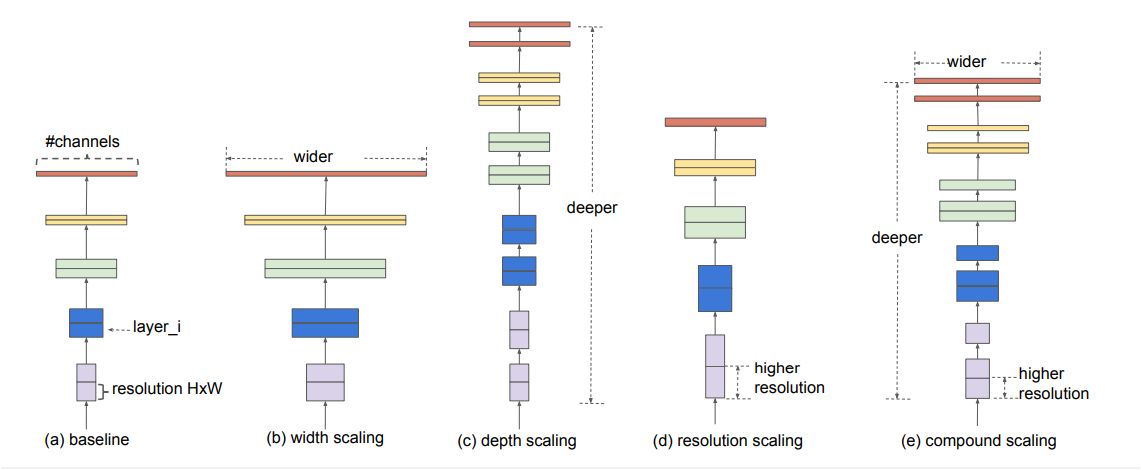

In [ ]:
from IPython.display import Image
Image(r'presentacion/redes.png')

- **a)** es el modelo **base de referencia**
- **b)** modelo que aumenta el ancho de la arquitectura
- **c)** modelo que aumenta la profundidad de la estructura
- **d)** modelo que aumenta la resolución de entrada a la red
- **e)** modelo que **escala uniformemente** las tres dimensiones

> "Nuestro estudio empírico muestra que es fundamental equilibrar todas las dimensiones de ancho/profundidad/resolución de la red y, sorprendentemente, dicho equilibrio se puede lograr simplemente escalando cada una de ellas con una proporción constante."  

>"Con base en esta observación, proponemos un método de escalado compuesto simple pero efectivo.
A diferencia de la práctica convencional que escala arbitrariamente estos factores[...]"
>><cite>Mingxing Tan, Quoc Le Proceedings of the 36th International Conference on Machine Learning, PMLR 97:6105-6114, 2019.</cite>


## Método de escalado compuesto
Utiliza un coeficiente compuesto $\phi$ para escalar uniformemente la profundidad($d$), ancho($w$) y la resolución($r$) de la siguiente forma

$$d=\alpha^{\phi}$$
$$w=\beta^{\phi}$$
$$r=\gamma^{\phi}$$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~S.a.$
$$\alpha \cdot \beta^2\cdot\gamma^2≈2$$
$$\alpha \geq 1,\beta\geq1,\gamma\geq1$$  

Con $\alpha,\beta,\gamma$ constantes determinadas a partir de una busqueda 
grillada pequeña(*small grid search*). Los parámetros optimales son **$\alpha=1.2,~\beta =1.1,~\gamma=1.15$**.  
La restriccion del problema está hecha que para cualquier nuevo valor de $\phi$, la cantidad de FLOPS total aumente aproximadameente $2^{\phi}$. 

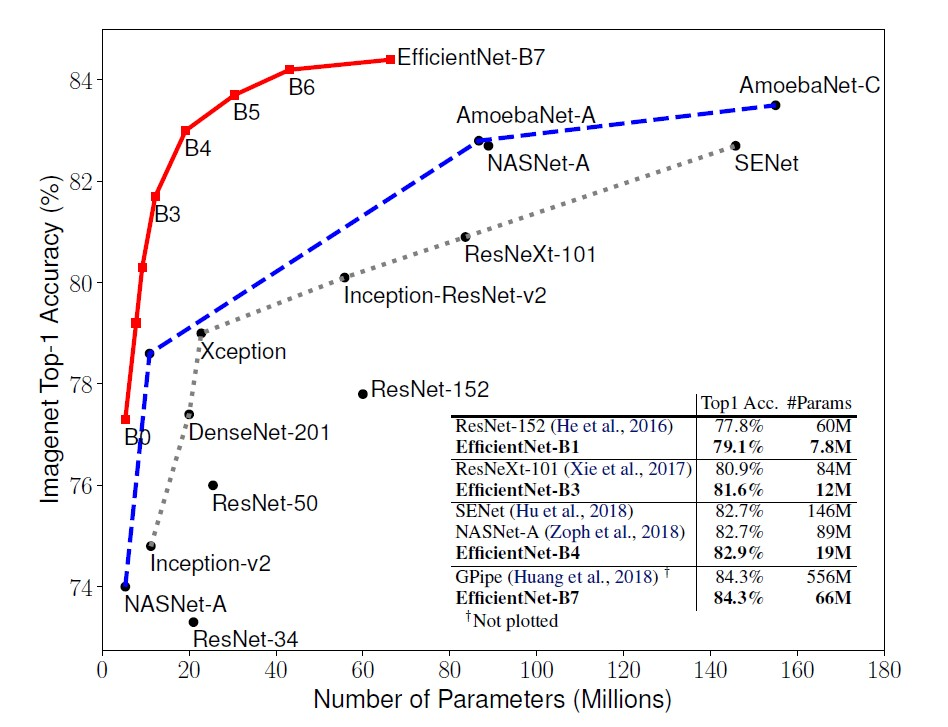

In [ ]:
Image(r'presentacion/efficentnet-accuracy-plot.jpg', width = 800)

# Arquitectura
La red base EfficientNet-B0 se basa en los bloques residuales de cuello de botella invertidos de MobileNetV2, además de los bloques de compresión y excitación.

Las Redes Eficientes comparten ciertos bloques de estructuras en el inicio y en el final, el bloque *stem* y el bloque de la capa final.


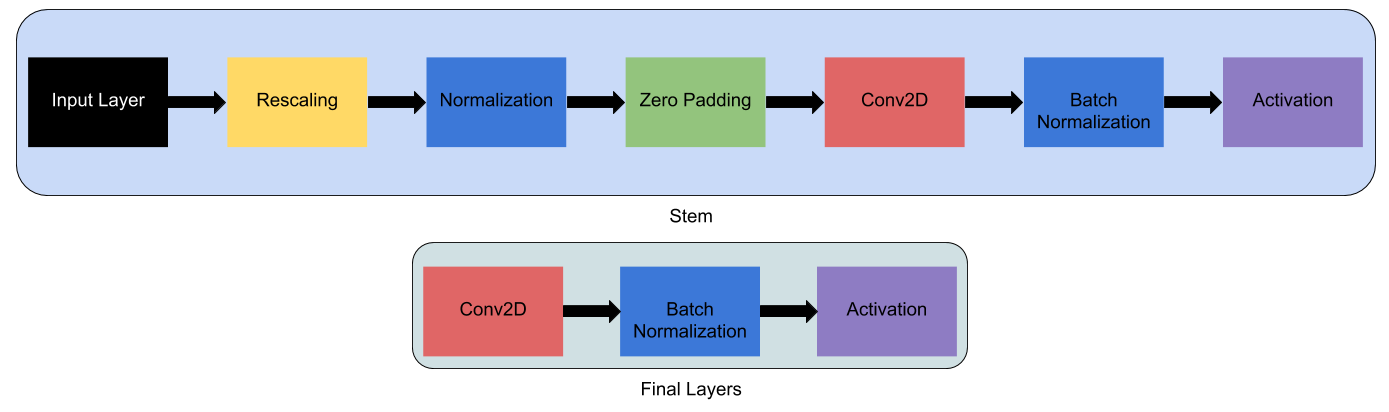

In [ ]:
Image('presentacion/común.png', width = 1000)

Si cuenta el número total de capas en EfficientNet-B0 el total es 237 y en EfficientNet-B7 el total sale a 813. Todas estas capas se pueden resumir en 5 módulos que se unen.

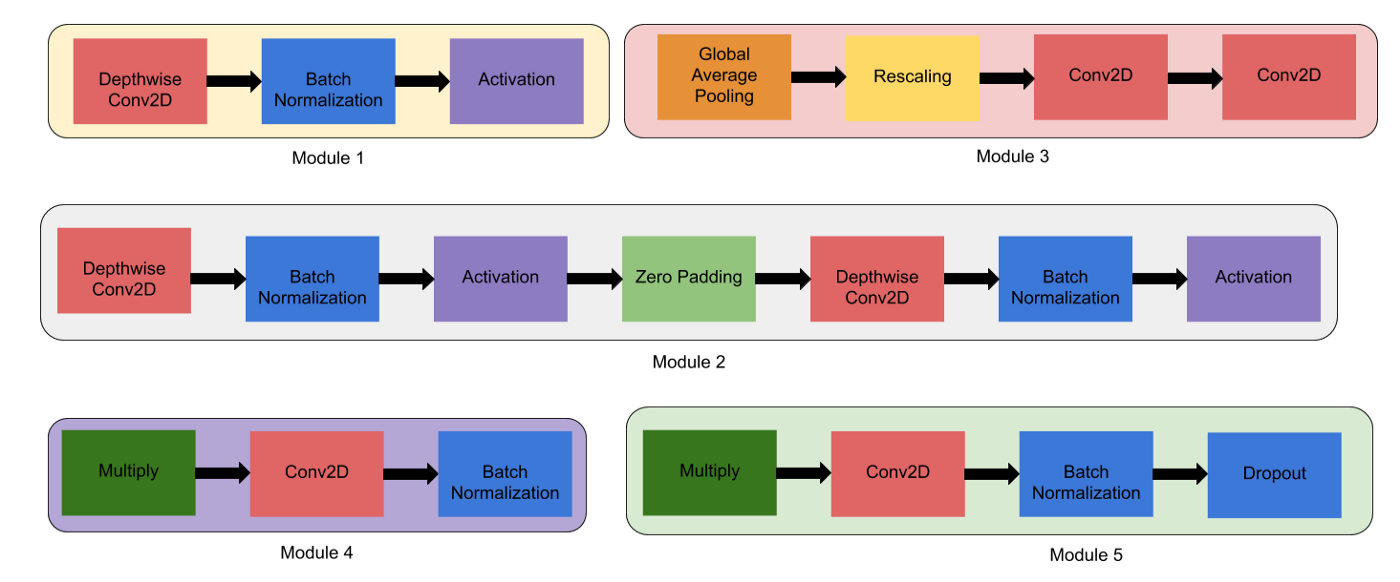

In [ ]:
Image('presentacion/modulosEN.png', width = 1000)


- **El modulo 1** es el punto de partida para la red.
- **El módulo 2** es el punto de partida para cada pila de módulos(sub-bloque) a excepción de la primera.
- **El módulo 3** es un módulo de transición entre moulos de entrada y salida de cada sub-bloque
- **El modulo 4** se utiliza para hacer la transición del primer sub-bloque de cada bloque al sub-bloque siguiente
-**El modulo 5** se usa para realizar unc combinacion entre el sub-bloque actual y el anterior.

La Red se compone del bloque stem, seguida de 7 bloques propios de la arquitectura B0 y el bloque de las capas finales. Estos bloques, como se ha mencionado, pueden contener sub-bloques que son básicamente combinaciones de modulos

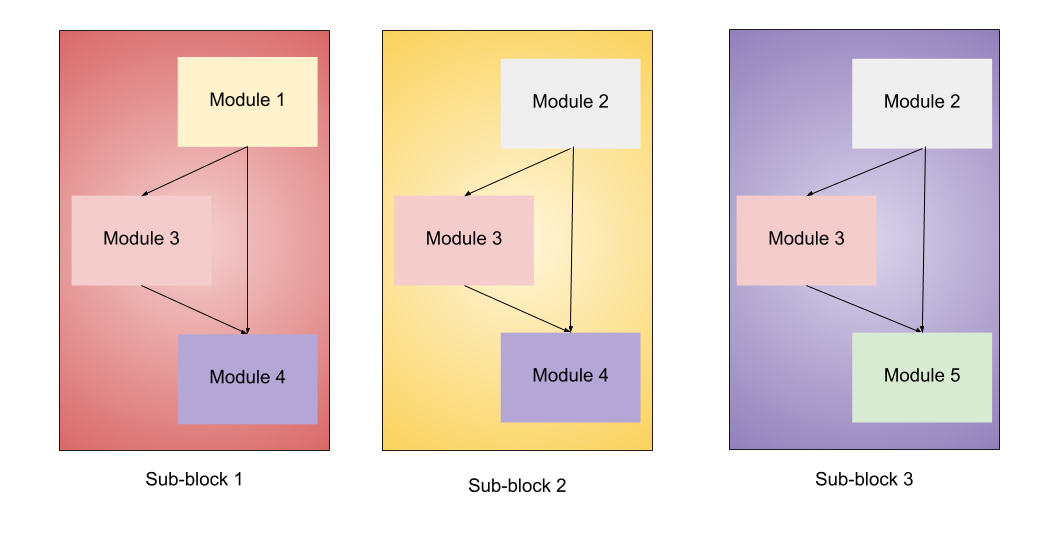

In [ ]:
Image('presentacion/sub-bloques.png', width = 800)

En base a estos sub-bloques se construye la arquitectura de EfficentNet, en particular EfficentNetB0 tiene la siguiente estructura

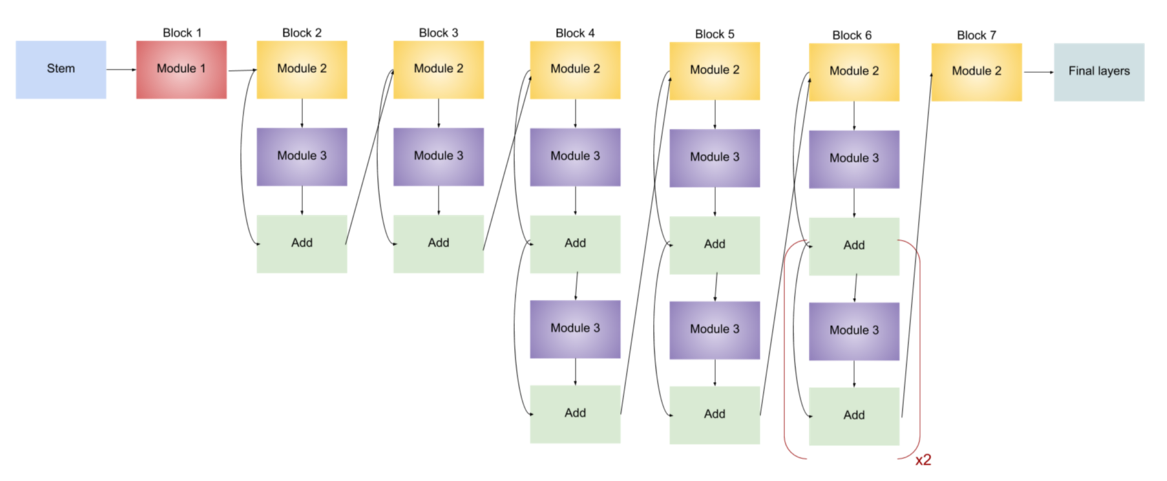

In [ ]:
Image('presentacion/estr-effnet.png')

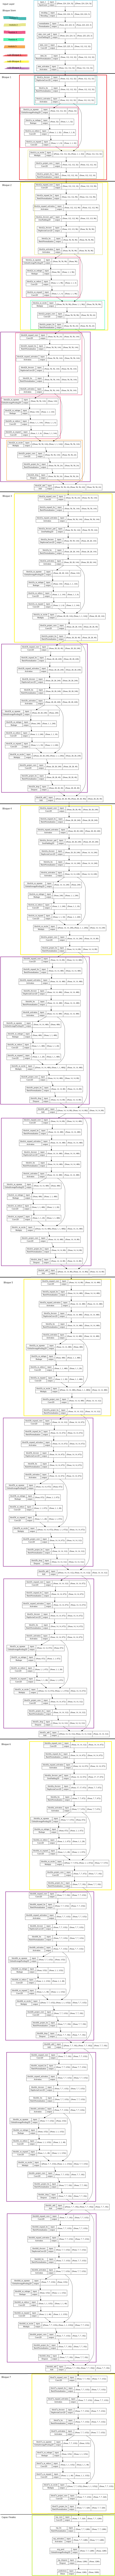

In [ ]:
Image('presentacion/efficentnetb0.png',width= 1000)

In [1]:
from tensorflow.keras.applications import EfficientNetB0

#EfficientNetB0 input_shape: (224, 224, 3)
model = EfficientNetB0(include_top=True,
                      weights="imagenet",
                      input_tensor=None,
                      input_shape=None,
                      pooling=None,
                      classes=1000,
                      classifier_activation="softmax"
                      )


21848064/21834768 [==============================] - 0s 0us/step


In [2]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [ ]:
#----------------Stem---------------

###Normalization

###Conv2D(3)
(3*3*3)*32
##Batch Normalization
(32*4)

#--------------Block 1--------------
##Subblock 1

###DepthwiseConv2D(3)
(3*3*1)*32
###Batch Normalization
32*4

###Conv2D(1)
(1*1*32+1)*8
###Conv2D(1)
(1*1*8+1)*32

###Conv2D(1)
(1*1*32)*16
###Batch Normalization
96*4
#--------------Block 2--------------
##Subblock 2

###Conv2D(1)
(1*1*16)*96
###Batch Normalization
(96)*4
###DepthwiseConv2D(4)
(4*4*1)*96
###Batch Normalization
(96)*4

##Conv2D(1)
(1*1*96+1)*4
##Conv2D
(1*1*4+1)*96

##Conv2D(1)
(1*1*96)*24
##Batch Normalization
(24)*4


96

In [ ]:
from tensorflow.keras.applications import  EfficientNetB7

#EfficientNetB7 input_shape: (600, 600, 3)
model1 = EfficientNetB7(include_top=True,
                       weights="imagenet",
                       input_tensor=None,
                       input_shape=None,
                       pooling=None,
                       classes=1000,
                       classifier_activation="softmax"
                       )

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import decode_predictions
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import re

def preprocesor(text):
  text = (re.sub('[\W]', ' ', str(text)))
  return [text.split()[1],str(int(text.split()[3][:2]))+','+text.split()[3][2:]+'%']
  return text.split()[1]+' \n '+'probability: '+text.split()[3][:2]+','+text.split()[3][3:]+' %'


def predict_image_EN(image_path, top=1):
    photo = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(photo)
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x)
    output = decode_predictions(prediction, top = top)

    if top > 1:
      ts = str(output).split(',')
      output = [ts[i:i + 3] for i in range(0, len(ts), 3)]
      return [preprocesor(o) for o in output]

    else:
      return preprocesor(output)

def display_top(path, top=1):
  if top == 1:
    predict = predict_image_EN(path)
    return(predict)
  
  else: 
    df = []
    for j in range(top):
      predict = predict_image_EN(path, top=top)[j]
      df.append([path.split('/')[-1], predict[0], f'top {j+1}',predict[1] ])
    return pd.DataFrame(df,columns = ['image_name', 'class_name', 'index', 'probability']).set_index('index')

def plot_top1class(path):
    f, ax = plt.subplots()
    im = plt.imread(path)
    final = [im.shape[0],im.shape[1]]
    im = ax.imshow(im)

    ax.text(10,final[0],predict_image_EN(path)[0]+'\n'+predict_image_EN(path)[1],
            bbox=dict(boxstyle="square",
                      ec=(1., 0.5, 0.5),
                      fc=(1., 0.8, 0.8),
                      )
            )
    ax.text(0,0,path.split('/')[1])
    plt.axis('off')
    
    return plt.show()

In [ ]:
paths = [r'Imagenes/'+image_name for image_name in os.listdir('Imagenes')]

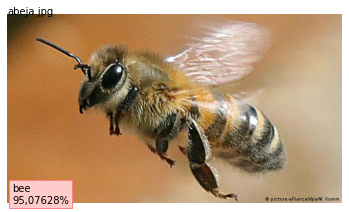

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | hummingbird  | 0,7666203%    |
| top 3   | fly          | 0,50266962%   |
| top 4   | weevil       | 0,11195194%   |
| top 5   | leaf_beetle  | 0,1106619%    |




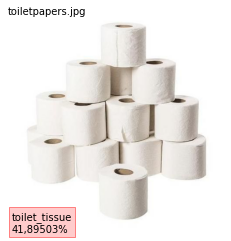

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | paper_towel  | 12,946934%    |
| top 3   | candle       | 2,415555%     |
| top 4   | pill_bottle  | 1,1959188%    |
| top 5   | honeycomb    | 1,0536728%    |




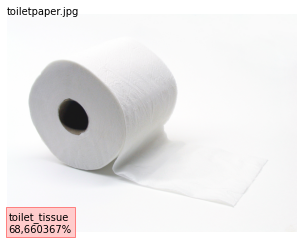

| index   | class_name       | probability   |
|:--------|:-----------------|:--------------|
| top 2   | paper_towel      | 9,798001%     |
| top 3   | pencil_sharpener | 0,41949865%   |
| top 4   | screw            | 0,27396092%   |
| top 5   | rubber_eraser    | 0,25224965%   |




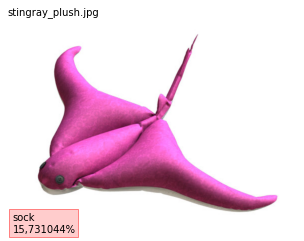

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | paintbrush   | 15,031238%    |
| top 3   | screwdriver  | 4,5715027%    |
| top 4   | pinwheel     | 3,1145431%    |
| top 5   | Band_Aid     | 3,0026041%    |




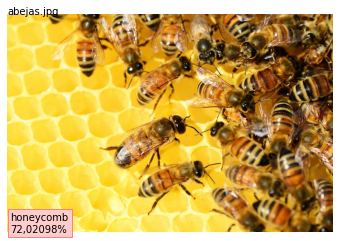

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | apiary       | 21,076599%    |
| top 3   | bee          | 2,388101%     |
| top 4   | isopod       | 0,05972101%   |
| top 5   | cockroach    | 0,049865514%  |




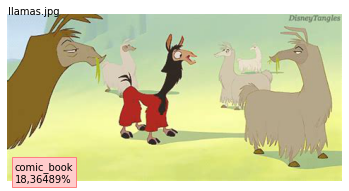

| index   | class_name     | probability   |
|:--------|:---------------|:--------------|
| top 2   | book_jacket    | 10,511027%    |
| top 3   | jersey         | 7,6452464%    |
| top 4   | shower_curtain | 3,484256%     |
| top 5   | parachute      | 2,9375043%    |




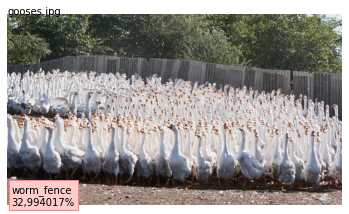

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | picket_fence | 13,776907%    |
| top 3   | corn         | 4,3243207%    |
| top 4   | ear          | 4,165792%     |
| top 5   | crane        | 2,8975522%    |




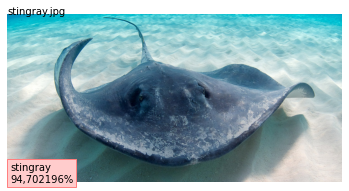

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | electric_ray | 2,1485245%    |
| top 3   | tiger_shark  | 0,10316905%   |
| top 4   | conch        | 0,06702259%   |
| top 5   | sandbar      | 0,039979475%  |




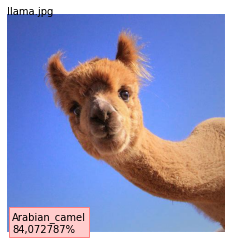

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | llama        | 12,171292%    |
| top 3   | koala        | 0,1854605%    |
| top 4   | lion         | 0,17849611%   |
| top 5   | sorrel       | 0,15339188%   |




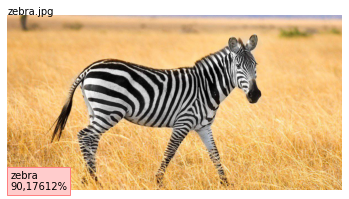

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | hartebeest   | 0,43550027%   |
| top 3   | gazelle      | 0,2729752%    |
| top 4   | impala       | 0,19980883%   |
| top 5   | warthog      | 0,19564992%   |




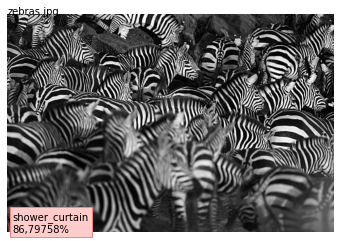

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | quilt        | 2,162123%     |
| top 3   | spider_web   | 1,4547244%    |
| top 4   | radiator     | 0,9009119%    |
| top 5   | velvet       | 0,76067606%   |




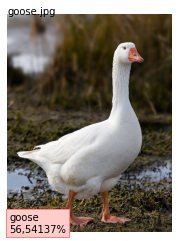

| index   | class_name         | probability   |
|:--------|:-------------------|:--------------|
| top 2   | ptarmigan          | 3,1008806%    |
| top 3   | partridge          | 3,0383462%    |
| top 4   | albatross          | 2,960864%     |
| top 5   | European_gallinule | 2,42905%      |




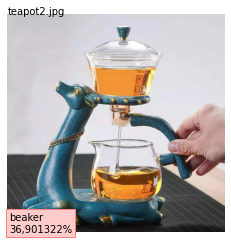

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | coffeepot    | 12,087586%    |
| top 3   | beer_glass   | 8,087378%     |
| top 4   | water_jug    | 6,9474235%    |
| top 5   | teapot       | 4,5123365%    |




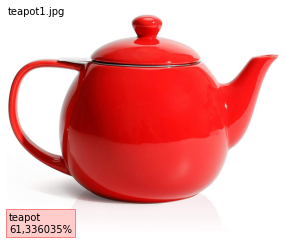

| index   | class_name   | probability   |
|:--------|:-------------|:--------------|
| top 2   | coffeepot    | 25,689307%    |
| top 3   | water_jug    | 3,527333%     |
| top 4   | pitcher      | 1,0037791%    |
| top 5   | coffee_mug   | 0,13565997%   |




In [ ]:
for path in paths:
  
  plot_top1class(path)
  print(display_top(path,top=5)[1:].drop('image_name',axis=1).to_markdown())
  print('\n')


|B7 top 1 acc|B7 top 5 acc|B0 top 1 acc| B0 top 5 acc|
|:-----------:|:----------:|:-----------:|:----------:|
|$\frac{9}{14}$|$\frac{11}{14}$|$\frac{8}{14}$|$\frac{9}{14}$|
|$64.2\%$|$78.6\%$|$57.1\%$|$64.2\%$|


